# File I/O

## open 형태

open함수를 활용하여 file을 열 수 있으며, File 관련 코드가 끝난 후 close를 하지 않으면 메모리에 읽어진 파일이 남아있는 상태이므로 꼭 close 해주어야한다. with과 함께 쓰게되면 close를 직접 하지 않아도 되어서 코드가 간결해진다.

In [9]:
f = open('./open.txt', mode='w')
f.write('Hello, World!')
f.close()

f = open('./open.txt', mode='r')
print(f.read())

Hello, World!


In [8]:
with open('./with_open.txt', mode='w') as f:
    f.write('Hello, World!')

with open('./with_open.txt', mode='r') as f:
    print(f.read())

Hello, World!


open 함수의 argument를 확인하여보면 다음과 같다.

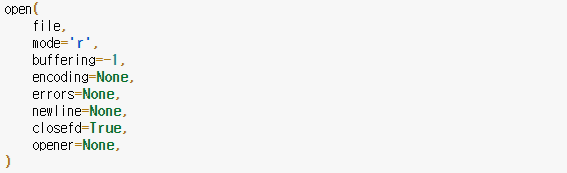

이 중에서 자주 사용하는 것은, file, mode, encoding.

* file : 파일의 경로. 상대 경로, 절대 경로 모두 가능하다.
* mode : 파일 열어서 어떤 것을 할지에 관한 옵션. r(read)이 default값
    + r(read) : 읽기 전용.
    + w(write) : 쓰기 전용. 경로에 파일이 존재하지 않으면 파일을 새로 생성. 파일이 존재하면 파일에 내용을 덮어씌워 이전의 내용이 사라진다.
    + a(appending) : 추가 전용. 경로에 파일이 존재하지 않으면 파일을 새로 생성. 파일이 존재하면 파일의 끝에 내용이 이어진다.
* encoding : 파일을 어떤 방식으로 인코딩할 것인지 설정.
    + 인코딩이란, 글자를 숫자로 표현하는 방법. 각 방법마다 표현할 수 있는 언어가 다르다.

# Object-Oriented Programming

## class와 object

우리가 만들어 보았던 변수와 함수를 어떠한 소속으로 묶는 것이 클래스이다.  
class와 object를 설명하면서 가장 많이 사용하는 것은 과자틀과 과자이다. (여기서 말하는 사람마다 object를 객체, instance라고도 하는데 이는 모두 같은 뜻이다.)  
**'class라는 붕어빵틀을 만들어 놓고, 거기에 필요한 재료를 넣어서 object인 붕어빵을 만드는 것이다.'** 라는 말을 기억하면서 뒤의 설명을 따라와 보자.

## class 정의 - 객체변수

이해를 돕기 위해 객체 지향 프로그래밍이 아닌, 아주 간단한 게임의 코드를 먼저 보자.  
우리는 지금부터
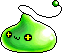
초록 슬라임과

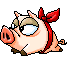
리본 돼지를 만들어 볼 것이다.

In [25]:
def B_attack_A(A_hp, B_attack):
    return A_hp - B_attack

def print_status(monster01_name, monster01_HP, monster01_attack, monster02_name, monster02_HP, monster02_attack):
    print('-'*10)
    print("monster01 status")
    print("name  :", monster01_name)
    print("HP    :", monster01_HP)
    print("attck :", monster01_attack)
    
    print()
    print("monster02 status")
    print("name  :", monster02_name)
    print("HP    :", monster02_HP)
    print("attck :", monster02_attack)
    print('-'*10)
    
monster01_name = '초록 슬라임'
monster01_HP = 80
monster01_attack = 25

monster02_name = '리본 돼지'
monster02_HP = 125
monster02_attack = 38

print_status(monster01_name, monster01_HP, monster01_attack, monster02_name, monster02_HP, monster02_attack)
monster01_HP = B_attack_A(monster01_HP, monster02_attack)
print_status(monster01_name, monster01_HP, monster01_attack, monster02_name, monster02_HP, monster02_attack)

----------
monster01 status
name  : 초록 슬라임
HP    : 80
attck : 25

monster02 status
name  : 리본 돼지
HP    : 125
attck : 38
----------
----------
monster01 status
name  : 초록 슬라임
HP    : 42
attck : 25

monster02 status
name  : 리본 돼지
HP    : 125
attck : 38
----------


여기서 만약에 새로운 몬스터를 추가하고 싶다면, 

```python
monster03_name = '새로운 몬스터'
monster03_HP = 1
monster03_attack = 1
```

와 같은 변수를 또 만들어주면 가능하다.

이런 코드에 클래스라는 개념을 도입해보자.

* **name과 hp, attak 변수를 가지고 있고,**
* **공격하는 함수와 공격받는 함수를 가지고 있는 틀을 먼저 만들고,**
* **이 틀을 이용해서 몬스터를 만들 때마다 찍어내면 편하지 않을까?'** 

라는 생각으로 시작할 수 있다. 먼저 변수 부분부터 시작하면 다음과 같다.

In [28]:
class Monster:
    def __init__(self, name, hp, attack):
        self.name = name
        self.HP = hp
        self.attack = attack
        
monster01 = Monster('초록 슬라임', 80, 25)
monster02 = Monster('리본 돼지', 125, 38)

Monster라는 Class를 만들기 위해서는 

```python 
class Monster:
```

로 시작을 하고, 함수와 마찬가지로 클래스 또한 꼭 **의미있는 이름**으로 지어야한다.  
그 다음은 init 이라는 함수를 만드는데 이것은 **생성자 함수**라고 한다.  
생성자 함수란, Object를 생성할 때에 내부에 필요한 변수를 셋팅(initialization)하는 함수로, 우리가 직접 호출한 적이 없어도 자동으로 실행되는 함수이다.

지금 이 생성자는 argument를 4개를 받고 있다.  
self란 객체를 말하는 것이라고 일단 이해하고, Monster를 만드는 데에 필요한 name, hp, attack을 argument로 받았다.  
여기서 **'.'은 코드를 읽을 때에 '~에 속한'이라고 해석**하면 이해하기 쉽다.

```python
self.name = name
```

를 읽으면, **'객체에 속한 name이라는 변수를 만들어서 argument로 들어온 name을 대입.'** 이 된다. 같은 방식으로 세가지 변수를 init한다.

```python
monster01 = Monster('초록 슬라임', 80, 25)
```

그 다음의 코드는 객체를 생성하는 코드이다. 코드를 그대로 읽어보면, **'Monster라는 class의 __init__ 함수를 실행하여 monster01라는 객체를 생성'** 이 된다.  

init 함수를 정의할 때 보면 argument가 4개 였는데 객체를 생성하는 부분을 보면 입력한 argument가 3개이다.  
객체인 'monster01'가 self라는 argument로 전달된다고 생각하면 된다.

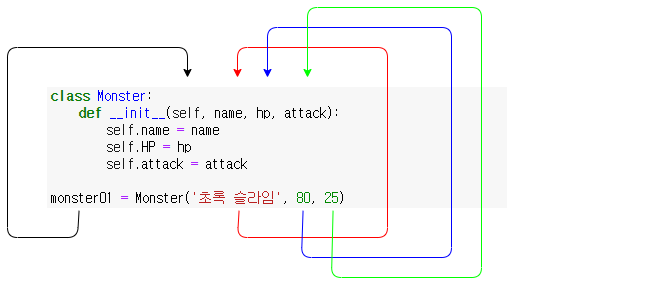

따라서,

```python
self.name = name
```

를 다시 읽어보면, **'monster01라는 객체에 속한 name이라는 변수를 만들어서 argument로 들어온 name을 대입해'** 라고 할 수 있다.

지금은 monster01와 monster02라는 객체 두 개를 생성하였는데, 만약에 새로운 monster를 더 생성한다고 하면, 전자의 방식보다 훨씬 수월하게 생성할 수 있다.

In [29]:
monster03 = Monster('New Monster03', 1, 1)
monster04 = Monster('New Monster04', 1, 1)
monster05 = Monster('New Monster05', 1, 1)
# ...
monster99 = Monster('New Monster99', 1, 1)

## class 정의 - 변수의 종류

클래스와 객체에 포함되는 변수의 종류를 두 가지의 기준은 다음과 같다.

* 어디에 속해 있는가?
    + 클래스 변수, 객체 변수
* 변수를 어디에서 접근할 수 있는가?
    + Public, Private 변수
    
### 클래스 변수와 객체 변수

소속이 클래스인 경우, 모든 객체가 공유하는 변수이며, 소속이 객체라면 객체 끼리 분리되어 있는 변수이다.

In [1]:
class Student:
    student_cnt = 0
    def __init__(self, value):
        self.value = value
        Student.student_cnt += 1

### Public, Private 변수

Public은 객체 외부에서 접근이 가능하고, Private은 객체 내부에서만 접근이 가능하다.  
접근을 제한 함으로써 중요한 변수가 외부에서 수정되지 않도록 하기 위해서 사용한다.

언더 바 두 개를 변수이름 앞에 붙여서 Public 변수를 Private 변수로 바꿀 수 있다.

In [2]:
class Student:
    def __init__(self, name):
        self.__name = name

In [3]:
student01 = Student('강형구')
print(student01.__name)

AttributeError: 'Student' object has no attribute '__name'

## class 정의 - 함수, 메소드

이제 함수를 class에 포함시키면 어떤 효과가 있는지에 코드로 보여주면 다음과 같다.

In [31]:
class Monster:
    def __init__(self, name, hp, attack):
        self.name = name
        self.HP = hp
        self.attack = attack
        
    def hurt(self, opponent_attack):
        self.HP -= opponent_attack
        
    def get_attack(self):
        return self.attack
    
    def print_status(self):
        print('-'*10)
        print("status")
        print("name  :", self.name)
        print("HP    :", self.HP)
        print("attck :", self.attack)
        print('-'*10)
    
def B_attack_A(A, B):
    A.hurt(B.get_attack())
    
monster01 = Monster('초록 슬라임', 80, 25)
monster02 = Monster('리본 돼지', 125, 38)

monster01.print_status()
monster02.print_status()
B_attack_A(monster01, monster02)
monster01.print_status()
monster02.print_status()

----------
status
name  : 초록 슬라임
HP    : 80
attck : 25
----------
----------
status
name  : 리본 돼지
HP    : 125
attck : 38
----------
----------
status
name  : 초록 슬라임
HP    : 42
attck : 25
----------
----------
status
name  : 리본 돼지
HP    : 125
attck : 38
----------


객체를 사용하지 않은 방식과 비교하여 보면 다음과 같다.

```python
# before
print_status(monster01_name, monster01_HP, monster01_attack, monster02_name, monster02_HP, monster02_attack)
monster01_HP = B_attack_A(monster01_HP, monster02_attack)
print_status(monster01_name, monster01_HP, monster01_attack, monster02_name, monster02_HP, monster02_attack)

# after
monster01.print_status()
monster02.print_status()
A.hurt(B.get_attack())
monster01.print_status()
monster02.print_status()
```

객체 내부에 있는 변수를 변화시키거나, print하는 것이기 때문에 argument가 많지도 않고 Refactoring도 훨씬 간편해졌음을 알 수 있다.

용어에 대해서 설명하자면, 

* 우리가 이전까지 정의하고 혼자서 독립적으로 호출이 가능했던 사용자 정의 함수는 **함수**,
* 객체 내부에 포함되어 호출하기 위해서는 객체가 필요한 함수를 **메소드**

라고 나눌 수 있다.

## Class 정의 - 매직 메소드

init 함수의 경우, 직접 호출하지 않아도 실행이 되는 함수가 있었다. 이렇게 특별한 상황에 자동으로 실행시켜주는 함수를 **매직 메소드**라고 하며, 이름의 앞뒤에 언더바 두개를 가지고 있는 것이 특징이다.  
어떤 메소드를 가지고 있는지 알려주는 **dir** 함수를 사용해보면 기본적으로 어떤 매직 메소드가 있는지 알 수 있다.

In [6]:
class TestClass:
    pass

test = TestClass()
print(dir(test))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__']


## 상속

OOP에서 Class는 상속이라는 개념이 존재한다. 상속을 사용한 코드를 먼저 보자.

In [9]:
class Vehicle:
    def __init__(self, capacity, zero100):
        self.capacity = capacity
        self.zero100 = zero100
        
class Car(Vehicle):
    def __init__(self, capacity, zero100, model):
        super().__init__(capacity, zero100)
        self.model = model

class Motorcycle(Vehicle):
    def __init__(self, capcacity, zero100, model, helmet):
        super().__init__(capacity, zero100)
        self.model = model
        self.helmet = helmet

class를 여러개 만들어야 하는 경우, 설계 단계에서 여러 클래스가 만약 하나의 카테고리 안에 묶이는지 생각해봐야한다.  
**공통되는 특성을 하나로 모아서 하나의 부모 Class로** 만들고 그 Class를 **상속받아서 자식 클래스를** 만드는 방식.  
상속을 받는다는 것은 모든 변수와 모든 메소드가 포함이 된다는 뜻이다.

```python
super().__init__(capacity, zero100)
```
여기서 이 super()는 부모 클래스를 말하는 것이고, "부모 클래스의 init함수와 같은 일을 해라" 라는 뜻이 된다.

# Module

저번 시간에 사용자 정의 함수를 배웠고, 이번 시간에는 사용자 정의 클래스를 배웠다.  
내가 자주 사용할 것 같은 함수와 클래스를 모아서 하나의 python 파일로 만들고, 다른 Python 파일을 만들 때에 사용하는 것을 **"모듈화를 시켜서 사용한다"** 라고 한다.

파이썬에서 다른 파일을 불러오는 방법은 다음과 같다.

```python
# test_import.py
class HowToImportClass:
    def __init__(self, A, B, C):
        self.A = A
        self.B = B
        self.C = C

    def printAll(self):
        print(self.A, self.B, self.C)
        
def HowToImportFunction(A):
    print(A)
```

파일 test_import.py를 불러올 예정.

## 방법 1

import my_function를 통해 my_function.py 파일을 가지고올 수 있다.

In [27]:
import my_function

내부의 function이나 class를 사용하려면

In [28]:
my_function.HowToImportFunction(123)

123


'~에 속한'을 의미하는 '.'을 함께 사용하면 된다.

여기에서 my_function 을 모두 쓰는 것이 아닌, as 를 활용하여 다른 단어로 사용할 수도 있다.

In [29]:
import my_function as mf

mf.HowToImportFunction(123)

123


## 방법 2

파일 자체를 import 하기 보단, 특정 함수나 특정 Class만 import 할 수도 있다.

In [30]:
from my_function import HowToImportClass

test_class = HowToImportClass(1, 2, 3)
test_class.printAll()

1 2 3


이 경우에는 HowToImportClass를 직접 가져왔기 때문에 '.'를 사용하지 않아도 된다.

'모든 것'을 의미하는 * 를 활용하면 파일 내부에 있는 모든 함수와 Class를 가져올 수 있다.

In [32]:
from my_function import *

HowToImportFunction(123)
test_Class = HowToImportClass(1, 2, 3)
test_Class.printAll()

123
1 2 3
